In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [8]:
df=pd.read_csv('UNZIP_FOR_NOTEBOOKS_FINAL/DATA/gene_expression.csv')
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


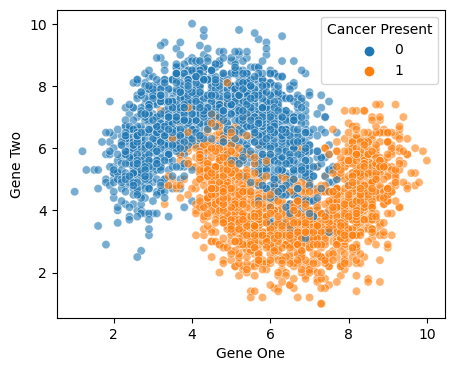

In [14]:
plt.figure(figsize=(5,4))
sns.scatterplot(data=df,x='Gene One',y='Gene Two',hue='Cancer Present',alpha=0.6)
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [18]:
x=df.drop('Cancer Present',axis=1)
y=df['Cancer Present']

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [45]:
scaler=StandardScaler()
scaled_x_train=scaler.fit_transform(x_train)
scaled_x_test=scaler.transform(x_test)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
# help(KNeighborsClassifer)

In [46]:
knn_model=KNeighborsClassifier(n_neighbors=1)

In [47]:
knn_model.fit(scaled_x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [48]:
y_pred=knn_model.predict(scaled_x_test)

In [35]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [49]:
confusion_matrix(y_test,y_pred)

array([[426,  44],
       [ 45, 385]], dtype=int64)

In [41]:
# plot_confusion_matrix(knn_model,scaled_x_test,y_test)
# plt.show()

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       470
           1       0.90      0.90      0.90       430

    accuracy                           0.90       900
   macro avg       0.90      0.90      0.90       900
weighted avg       0.90      0.90      0.90       900



In [53]:
# Choosing K value
# in the full cross validation grid search we will be using a new sklearn object Pipeline 
# that can set up a sequence of repeated operations, like scaler and model

In [59]:
from sklearn.metrics import accuracy_score
test_error_rates=[]

for k in range(1,30):
    knn_model=KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_x_train,y_train)
    y_pred=knn_model.predict(scaled_x_test)
    test_error=1-accuracy_score(y_test,y_pred)
    test_error_rates.append(test_error)

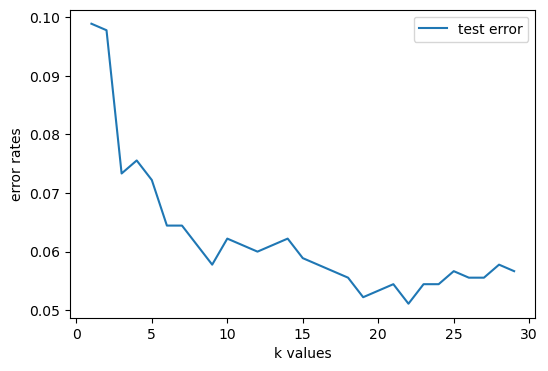

In [66]:
plt.figure(figsize=(6,4))
plt.plot(range(1,30),test_error_rates,label='test error')
plt.xlabel('k values')
plt.ylabel('error rates')
plt.legend()
plt.show()

## set up Pipeline

We'll use a Pipeline object to set up a workflow of operations:

1. Scale Data
2. Create Model on Scaled Data

In [69]:
scaler=StandardScaler()
knn=KNeighborsClassifier()

In [73]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [87]:
# the string should match up with the variable name
operations=[('scaler',scaler),('knn',knn)]

In [76]:
from sklearn.pipeline import Pipeline

In [88]:
pipe=Pipeline(operations)

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
k_values=list(range(1,20))

In [82]:
param_grid={'knn__n_neighbors':k_values}

In [89]:
full_cv_classifier=GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [94]:
full_cv_classifier.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [95]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=16))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=16),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 16,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [97]:
full_pred= full_cv_classifier.predict(x_test)

In [98]:
print(classification_report(y_test,full_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.93      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [99]:
# Final Model

In [100]:
new =[[3.8,6.4]]

In [101]:
full_cv_classifier.predict(new)

array([0], dtype=int64)

In [102]:
full_cv_classifier.predict_proba(new)

array([[1., 0.]])